In [1]:
import sys
sys.path.append('..')
# reload local packages automatically
%load_ext autoreload
%autoreload 2

In [2]:
from opentn.channels import get_krauss_from_unitary
from opentn.circuits import get_unitary_adchannel
from opentn.states.qubits import up,down, plus, minus
from opentn.tensors import MPO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# First I will construct the krauss operators corresponding to a small time step for the amplitude damping channel.
# I should mention, however, that here there is not hamitlonian, beacause we are looking at it in the interaction picture
# after I build the krauss operators, I can evolve it n times to reach a certain t = n*dt and compare with the gamma corresponding to the total time
# using the actual krauss operators from 'purifications_tn.ipynb'

t = 1#np.log(2)
gamma_init = 1 #normalized for iniital gamma
gamma =  1 - np.exp(-gamma_init*t)
print(gamma)
krauss_list_t = get_krauss_from_unitary(get_unitary_adchannel(gamma=gamma))

# initial state: fixed here
phys_init = plus
a,b = phys_init
psi_pure = np.zeros(shape=(1,1,2,1),dtype=np.complex128) #vL vR up down. Assuming environment is by default zero
psi_pure[:,:,0,:] = a
psi_pure[:,:,1,:] = b

0.6321205588285577


In [4]:
A = MPO([psi_pure])
A.apply_krauss_operators(krauss_list=krauss_list_t)
rho_purified_t = A.get_density_matrix()
rho_purified_t

array([[0.81606028+0.j, 0.30326533+0.j],
       [0.30326533+0.j, 0.18393972+0.j]])

In [7]:
# now let's do dt = t/n for different n
ns = np.linspace(1,20,20, dtype=int)
norms_n = []
for n in ns:
    dt = t/n
    k0_dt = np.array([[1,0],[0,1-dt*gamma_init/2]], dtype=complex)
    k1_dt = np.array([[0, np.sqrt(dt*gamma_init)],[0,0]], dtype=complex)
    krauss_list_dt = [k0_dt, k1_dt]
    A = MPO([psi_pure])
    for _ in range(n):
        A.apply_krauss_operators(krauss_list=krauss_list_dt)
    rho_purified_dt = A.get_density_matrix()
    rho_purified_dt
    norm = np.linalg.norm(rho_purified_t-rho_purified_dt, ord='fro')
    norms_n.append(norm)

Text(0, 0.5, 'norm difference')

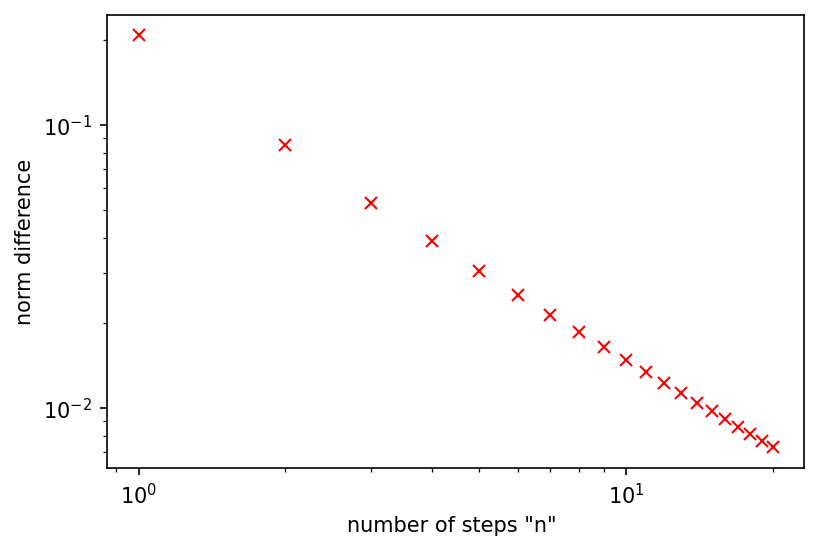

In [9]:
plt.figure(dpi=150)
plt.loglog(ns, norms_n, 'rx')
plt.xlabel('number of steps "n" ')
plt.ylabel('norm difference')

In [2]:
import numpy as np
C = (1/10)*np.array([[7,1],[-1,7]])
Cp = C.conj().T

C@Cp

array([[0.5, 0. ],
       [0. , 0.5]])

In [3]:
Cp@C

array([[0.5, 0. ],
       [0. , 0.5]])

In [8]:
u, s, vh = np.linalg.svd(C)

In [9]:
s

array([0.70710678, 0.70710678])

In [10]:
u

array([[-0.98994949,  0.14142136],
       [ 0.14142136,  0.98994949]])

In [12]:
vh.conj().T

array([[-1.,  0.],
       [-0.,  1.]])

In [13]:
1/7

0.14285714285714285

In [14]:
1/10

0.1